## Oppgave 6 Prediktiv analyse
### Importerer nødvendige biblioteker

In [31]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Valg av flyplass, enten ENOL eller ENBO

In [2]:
#airport = "ENBO"
airport = "ENOL"

In [3]:
file_path = f'../data/csv/{airport}_wind_data.csv'
df_ENOL = pd.read_csv(file_path)


### Sjekker informasjon om data frame

In [4]:
df_ENOL.shape
df_ENOL.round(1).info()
df_ENOL.describe(include='all').round(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17708 entries, 0 to 17707
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airport         17708 non-null  object 
 1   Date/time       17708 non-null  object 
 2   Wind_direction  17708 non-null  int64  
 3   Wind_speed      17708 non-null  int64  
 4   Gust_speed      685 non-null    float64
 5   QNH             17708 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 830.2+ KB


,Airport,Date/time,Wind_direction,Wind_speed,Gust_speed,QNH
count,17708,17708,17708.0,17708.0,685.0,17708.0
unique,1,1493,NaN,NaN,NaN,NaN
top,ENOL,201850Z,NaN,NaN,NaN,NaN
freq,17708,14,NaN,NaN,NaN,NaN
mean,NaN,NaN,182.3,11.8,40.3,1007.9
std,NaN,NaN,93.3,7.1,7.4,12.9
min,NaN,NaN,0.0,0.0,19.0,956.0
25%,NaN,NaN,120.0,7.0,35.0,1000.0
50%,NaN,NaN,140.0,11.0,40.0,1008.0
75%,NaN,NaN,260.0,16.0,44.0,1017.0


eksempel på analyse https://medium.com/analytics-vidhya/applying-linear-regression-on-a-weather-data-set-e84901120f88

### Vindhastighet over tid
ett punkt per dag i ett år

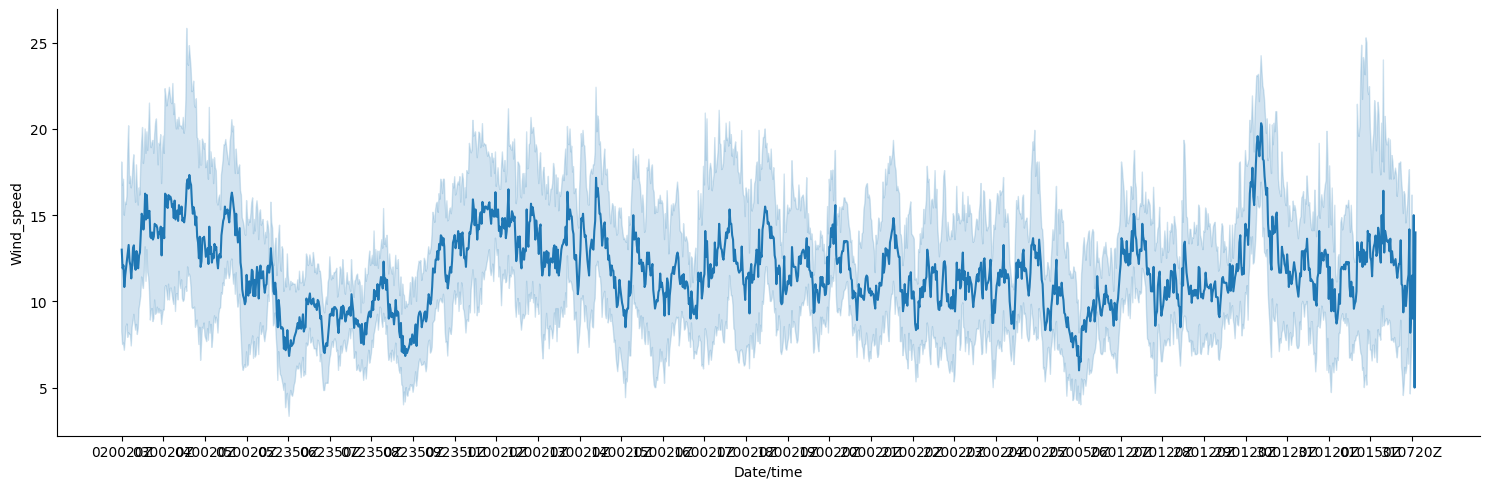

In [5]:
df_hver48 = df_ENOL.iloc[48:]

plot1 = sns.relplot(x="Date/time", y="Wind_speed", kind="line", data=df_hver48, height=5, aspect=3)
plot1.fig.suptitle("", y=1.03)
ticks, labels = plt.xticks()
plt.xticks(ticks[::48], labels[::48])
plt.show()


Tilfeller av missing data
Airport               0
Date/time             0
Wind_direction        0
Wind_speed            0
Gust_speed        17023
QNH                   0
dtype: int64
Tilfeller av registrert data
Airport           17708
Date/time         17708
Wind_direction    17708
Wind_speed        17708
Gust_speed          685
QNH               17708
dtype: int64
Matrise for visualisering av missing data


<Axes: >

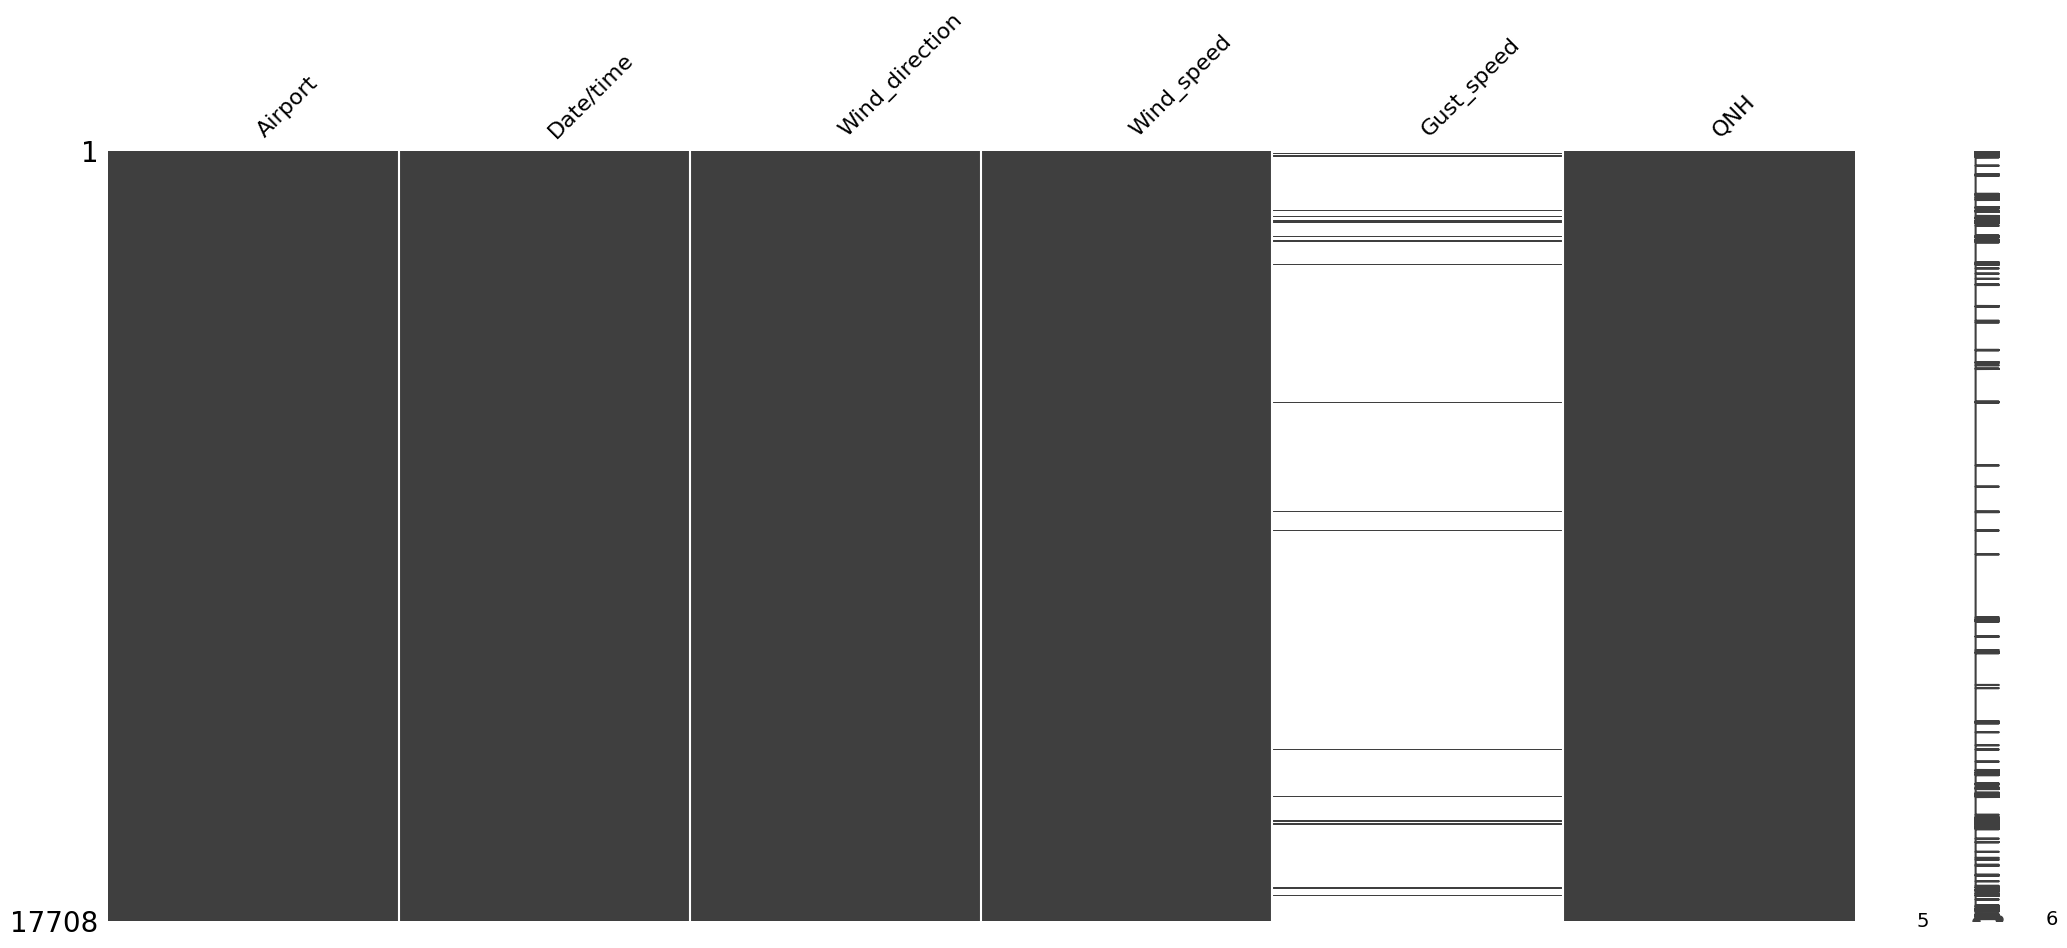

In [6]:
# Identifiserer missing data
print("Tilfeller av missing data")
print(df_ENOL.isnull().sum())

print("Tilfeller av registrert data")
print(df_ENOL.count())

print("Matrise for visualisering av missing data")
msno.matrix(df_ENOL)

Ser etter outliers


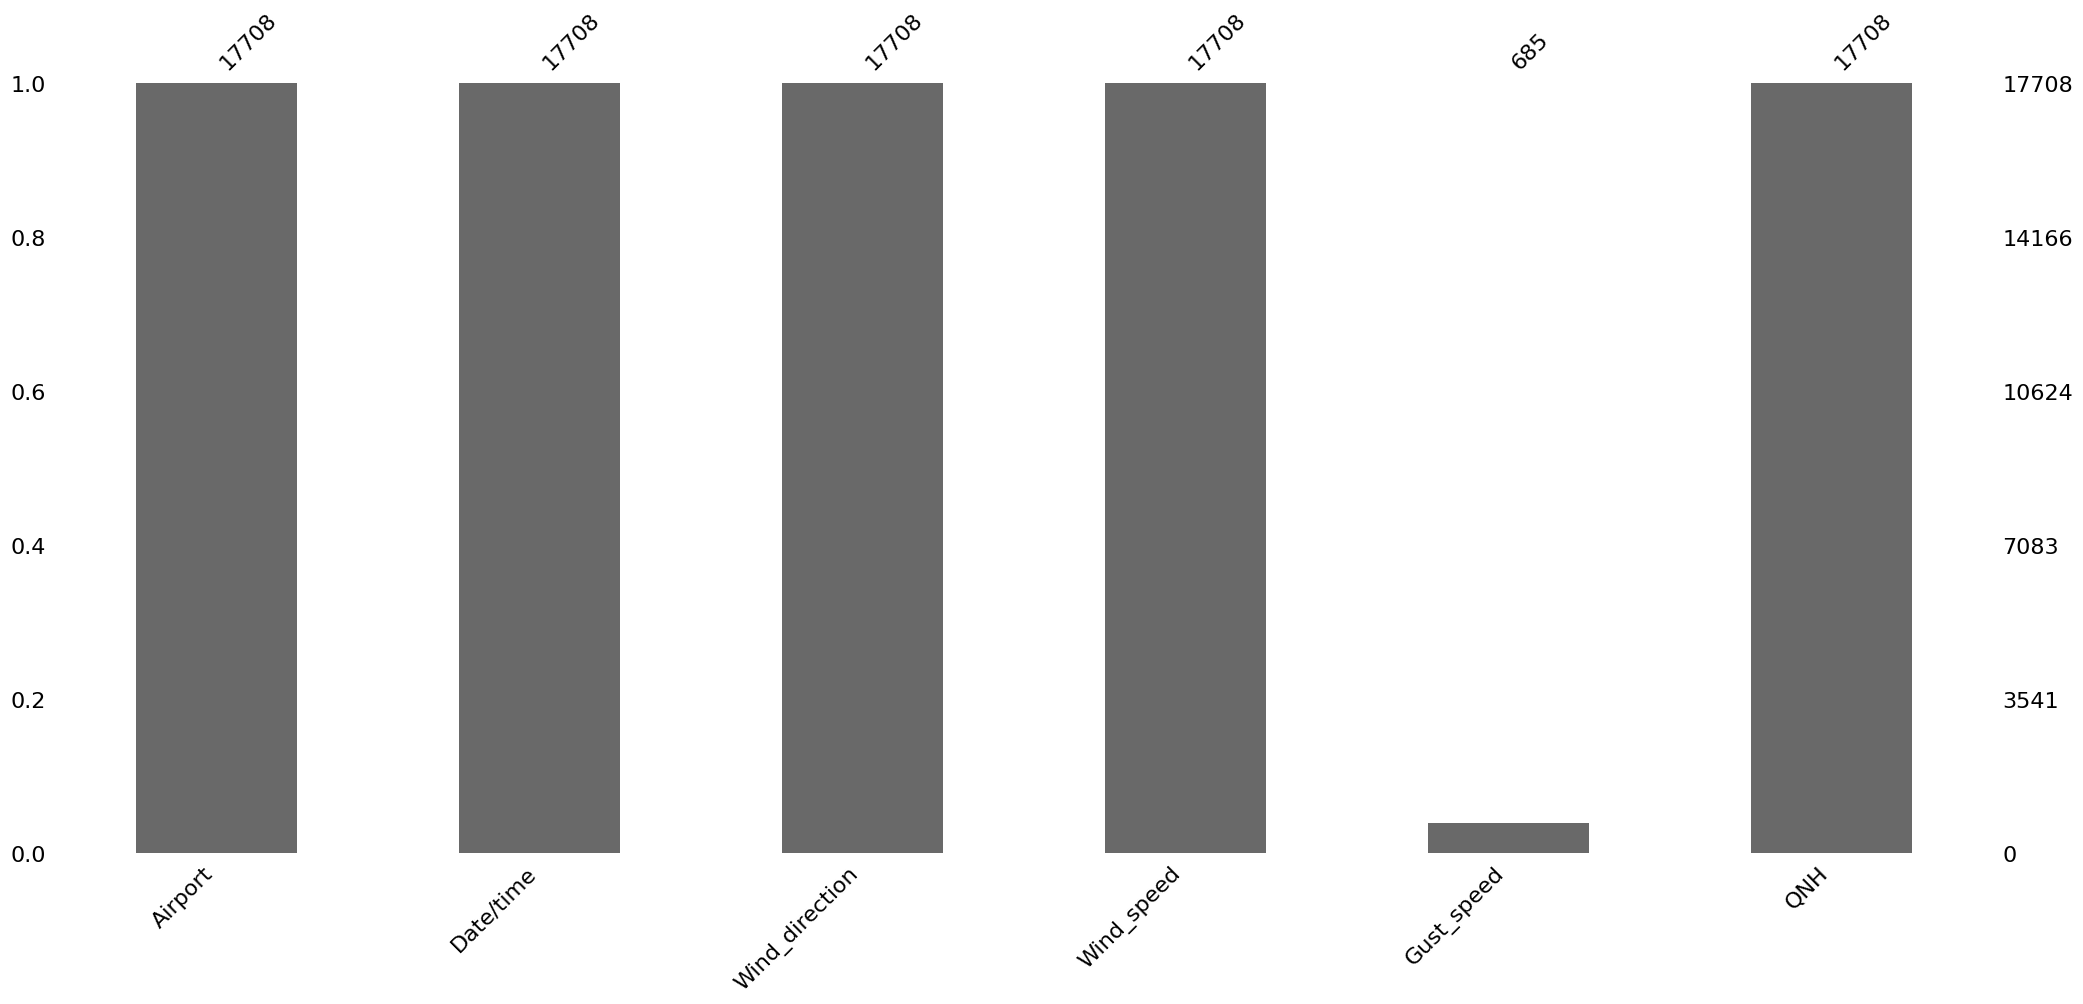

In [7]:
msno.bar(df_ENOL)
print("Ser etter outliers")

In [8]:
# Drop duplicates
df_ENOL = df_ENOL.drop_duplicates(subset=["Date/time"], keep="last")
df_ENOL.shape

(1493, 6)

In [9]:
# Sorterer dataframen etter dato 
df_ENOL.sort_values(by=['Airport'], inplace=True)
df_ENOL.reset_index(drop=True, inplace=True)

In [10]:
# Fjerner unødvendige kolonner
df_ENOL = df_ENOL.drop(columns=['Airport', 'Date/time'])
print(df_ENOL.isnull().sum(axis=0)* 100/len(df_ENOL))

Wind_direction     0.000000
Wind_speed         0.000000
Gust_speed        90.689886
QNH                0.000000
dtype: float64


<Axes: >

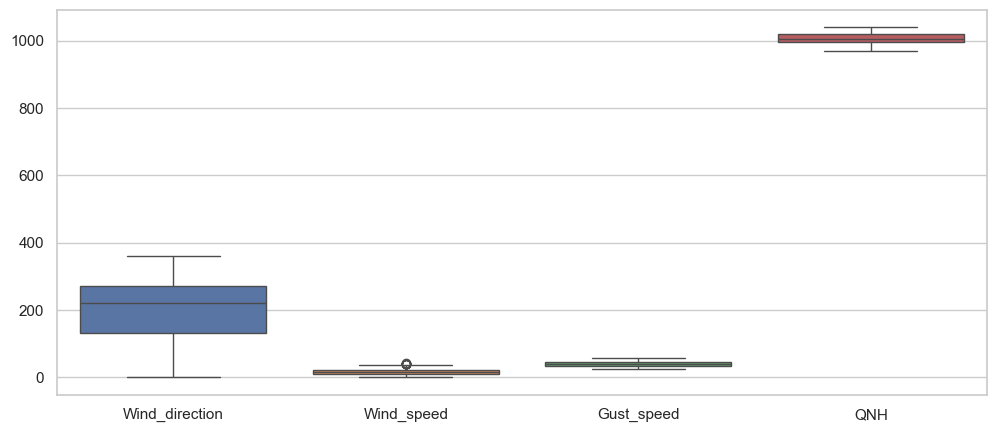

In [11]:
# Visualiserer data
sns.set(rc={'figure.figsize':(12,5)}, style='whitegrid')
sns.boxplot(data=df_ENOL)

In [12]:
df_ENOL = df_ENOL[df_ENOL['Wind_speed'] > 0]
df_ENOL = df_ENOL[df_ENOL['Gust_speed'] > 0]
df_ENOL = df_ENOL[df_ENOL['Wind_direction'] > 0]
df_ENOL = df_ENOL[df_ENOL['Wind_direction'] < 360]

df_ENOL.reset_index(inplace=True, drop=True)
df_ENOL.shape


(139, 4)

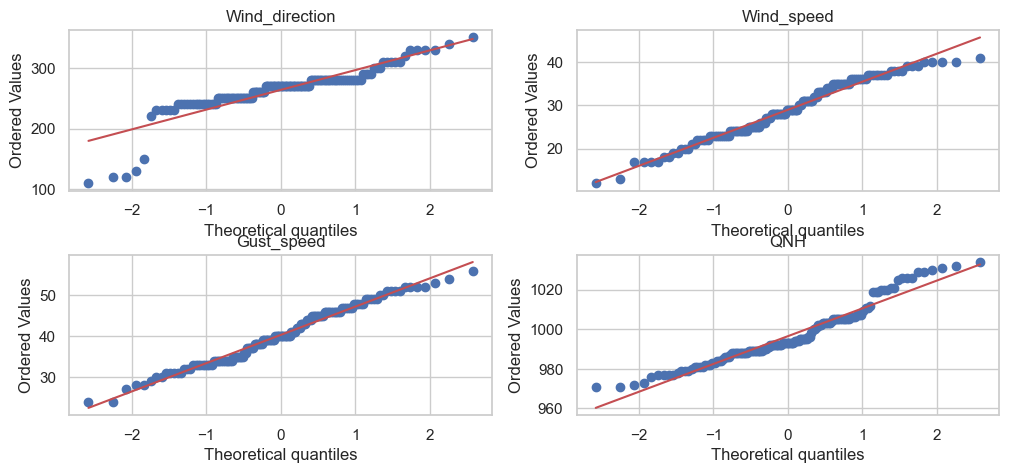

In [13]:
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(df_ENOL.columns):
    stats.probplot(df_ENOL[column], dist="norm", plot=axes[i//2, i%2])
    axes[int(i/2), i%2].set_title(column)
plt.show()

C:\Users\Olehe\AppData\Local\Temp\ipykernel_25144\3184702607.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_ENOL.hist(ax=axes[int(i/2)][i%2])


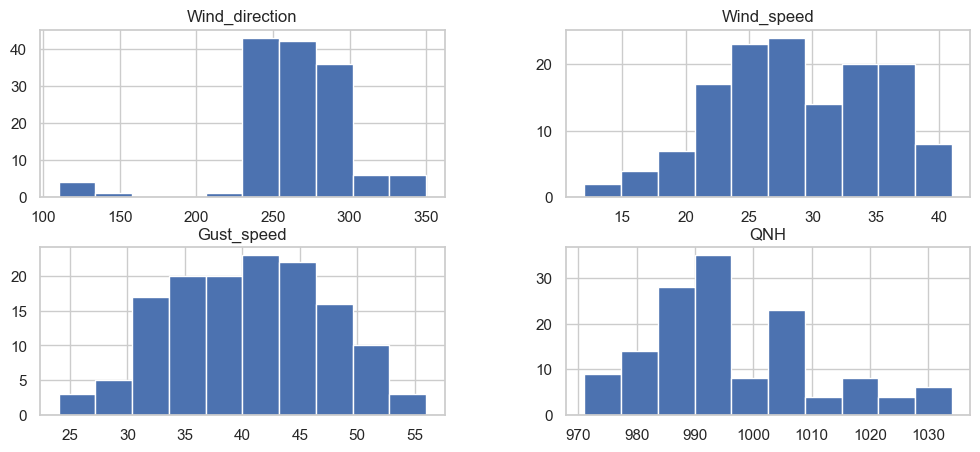

In [14]:
fig, axes = plt.subplots(2,2)
df_ENOL.hist(ax=axes[int(i/2)][i%2])
plt.show()

# Sortering av data likt oppgave 4 etter data cleaning med visualisering

In [15]:
df_ENOL.groupby('Wind_direction').mean()

,Wind_speed,Gust_speed,QNH
Wind_direction,,,
110,18.000000,29.000000,977.000000
120,19.500000,30.500000,996.500000
130,23.000000,33.000000,1009.000000
150,19.000000,32.000000,994.000000
220,24.000000,34.000000,1003.000000
230,21.800000,32.600000,1003.000000
240,26.750000,37.687500,1004.312500
250,26.454545,38.000000,1009.590909
260,27.000000,38.111111,997.111111


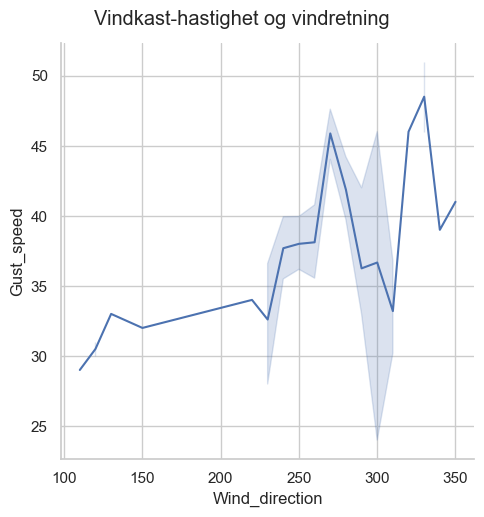

In [16]:
# Plot med hensyn på vindretning og vindkast-hastighet etter data cleaning
plot1 = sns.relplot(x="Wind_direction", y="Gust_speed", kind="line", data=df_ENOL)
_ = plot1.fig.suptitle("Vindkast-hastighet og vindretning", y=1.03)


In [17]:
df_ENOL.groupby('QNH').mean()

,Wind_direction,Wind_speed,Gust_speed
QNH,,,
971,245.000000,29.500000,41.000000
972,240.000000,29.000000,39.000000
973,240.000000,24.000000,34.000000
976,300.000000,35.000000,46.000000
977,262.500000,26.500000,37.250000
978,330.000000,35.000000,45.000000
979,303.333333,29.000000,40.666667
980,290.000000,23.000000,33.000000
981,290.000000,33.500000,45.500000


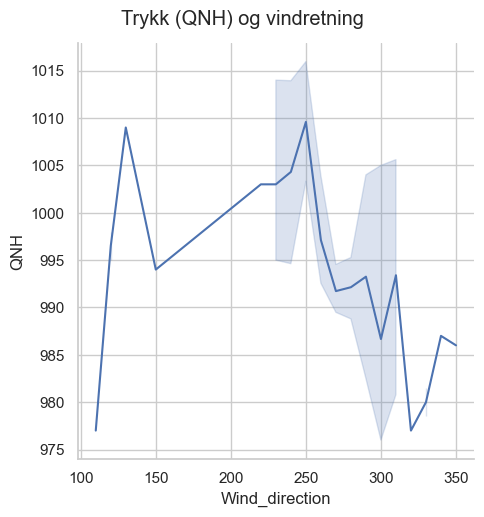

In [18]:
# Plot med hensyn på vindretning og vindkast-hastighet etter data cleaning
plot2 = sns.relplot(x="Wind_direction", y="QNH", kind="line", data=df_ENOL)
_ = plot2.fig.suptitle("Trykk (QNH) og vindretning", y=1.03)


## Predektiv analyse
Lineær regresjon

In [39]:
reg = LinearRegression()

# Husk dobbeltklammer her!
x = df_ENOL[['Wind_speed', 'Gust_speed', 'QNH']]
y = df_ENOL['Wind_direction']

reg.fit(x, y)

print(f"Regresjonskoeffisienter. Intercept: {reg.intercept_.round(2)}")

Regresjonskoeffisienter. Intercept: 499.35


In [66]:
# Definerer input og target
x = df_ENOL[['Wind_direction', 'Wind_speed', 'Gust_speed']]
y = df_ENOL['QNH']

# Deler data inn i treningssett og testsett
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tren modellen
modell = LinearRegression()
modell.fit(x_train, y_train)

# Prediksjon på testdata
y_pred = modell.predict(x_test)

# Skrive ut resultater
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²-score:", r2_score(y_test, y_pred))
print("Koeffisienter:", modell.coef_)
print("Intercept:", modell.intercept_)


MSE: 142.72382178424917
R²-score: 0.18359628861401767
Koeffisienter: [-0.03902009 -2.01921184  0.83448266]
Intercept: 1031.7267577716348


### Scatter plot for prediksjon av QNH sammenlignet med faktisk QNH

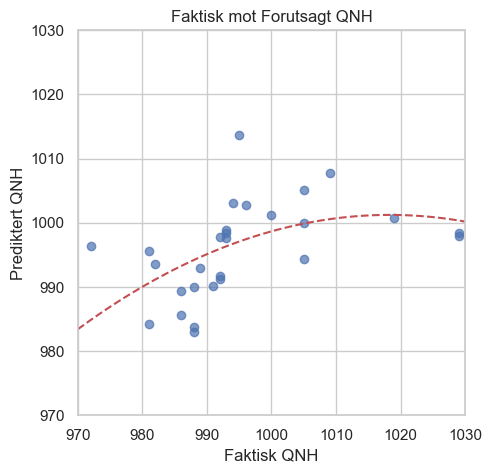

In [59]:
coeffs = np.polyfit(y_test, y_pred, deg=2)
trendline = np.poly1d(coeffs)
x_vals = np.linspace(970, 1030, 100)

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(x_vals, trendline(x_vals), 'r--', label='Trendlinje')
plt.xlim(970, 1030)
plt.ylim(970, 1030)
plt.xlabel("Faktisk QNH")
plt.ylabel("Prediktert QNH")
plt.title("Faktisk mot Forutsagt QNH")
plt.grid(True)
plt.show()


Vi ser at det er vanskelig å predektere QNH med tanke på vindretning og vindkast-hastighet.
Vi ser også at det er vanskelig å forutsi trykket i hver ende, altså når trykket er lavt og høyt.
Vi ser derimot at når trykket er rundt 1000, altså stabilt, er det lettere å forutsi trykket.

I dette tilfellet mener vi det er naturlig med en andregrads-trendlinje, da lavtrykk og høytrykk er mer ustabilt og vanskligere å forutsi. Når det er nøytralt trykk (rundt 1000 i QNH) er det enklere å forutsi, da dette er betydelig mer stabile værforhold. Trendlinjen gir en indikasjon på at det er noe sammenheng mellom de to variablene.
Det er naturlig at det er flere ting en vinddata som påvirker trykk (QNH). Dersom prediksjonen skulle vært mer nøyaktig hadde det vært naturlig å inkludere flere typer værdata, som for eksempel temeper og duggpunkt.

In [43]:
features = x.columns
for feature, coef in zip(features, modell.coef_):
    print(f"{feature}: {coef:.4f}")


Wind_direction: -0.0390
Wind_speed: -2.0192
Gust_speed: 0.8345


## Håndtering av datasett med mangler.

### Dette datasettet mangler april

In [26]:
file_path_missing_data = '../data/csv/ENOL_wind_data_missing_april.csv'
df_ENOL_missing_data = pd.read_csv(file_path_missing_data) # Datasett som mangler april

### Identifiserer missing data for april

In [45]:
print("Tilfeller av missing data")
print(df_ENOL_missing_data.isnull().sum())

print("Tilfeller av registrert data")
print(df_ENOL_missing_data.count())

Tilfeller av missing data
Airport            1488
Date/time          1488
Wind_direction     1488
Wind_speed         1488
Gust_speed        17080
QNH                1488
dtype: int64
Tilfeller av registrert data
Airport           16256
Date/time         16256
Wind_direction    16256
Wind_speed        16256
Gust_speed          664
QNH               16256
dtype: int64


Ser at det mangler store mengder data.

### Matrise for missing data for april

<Axes: >

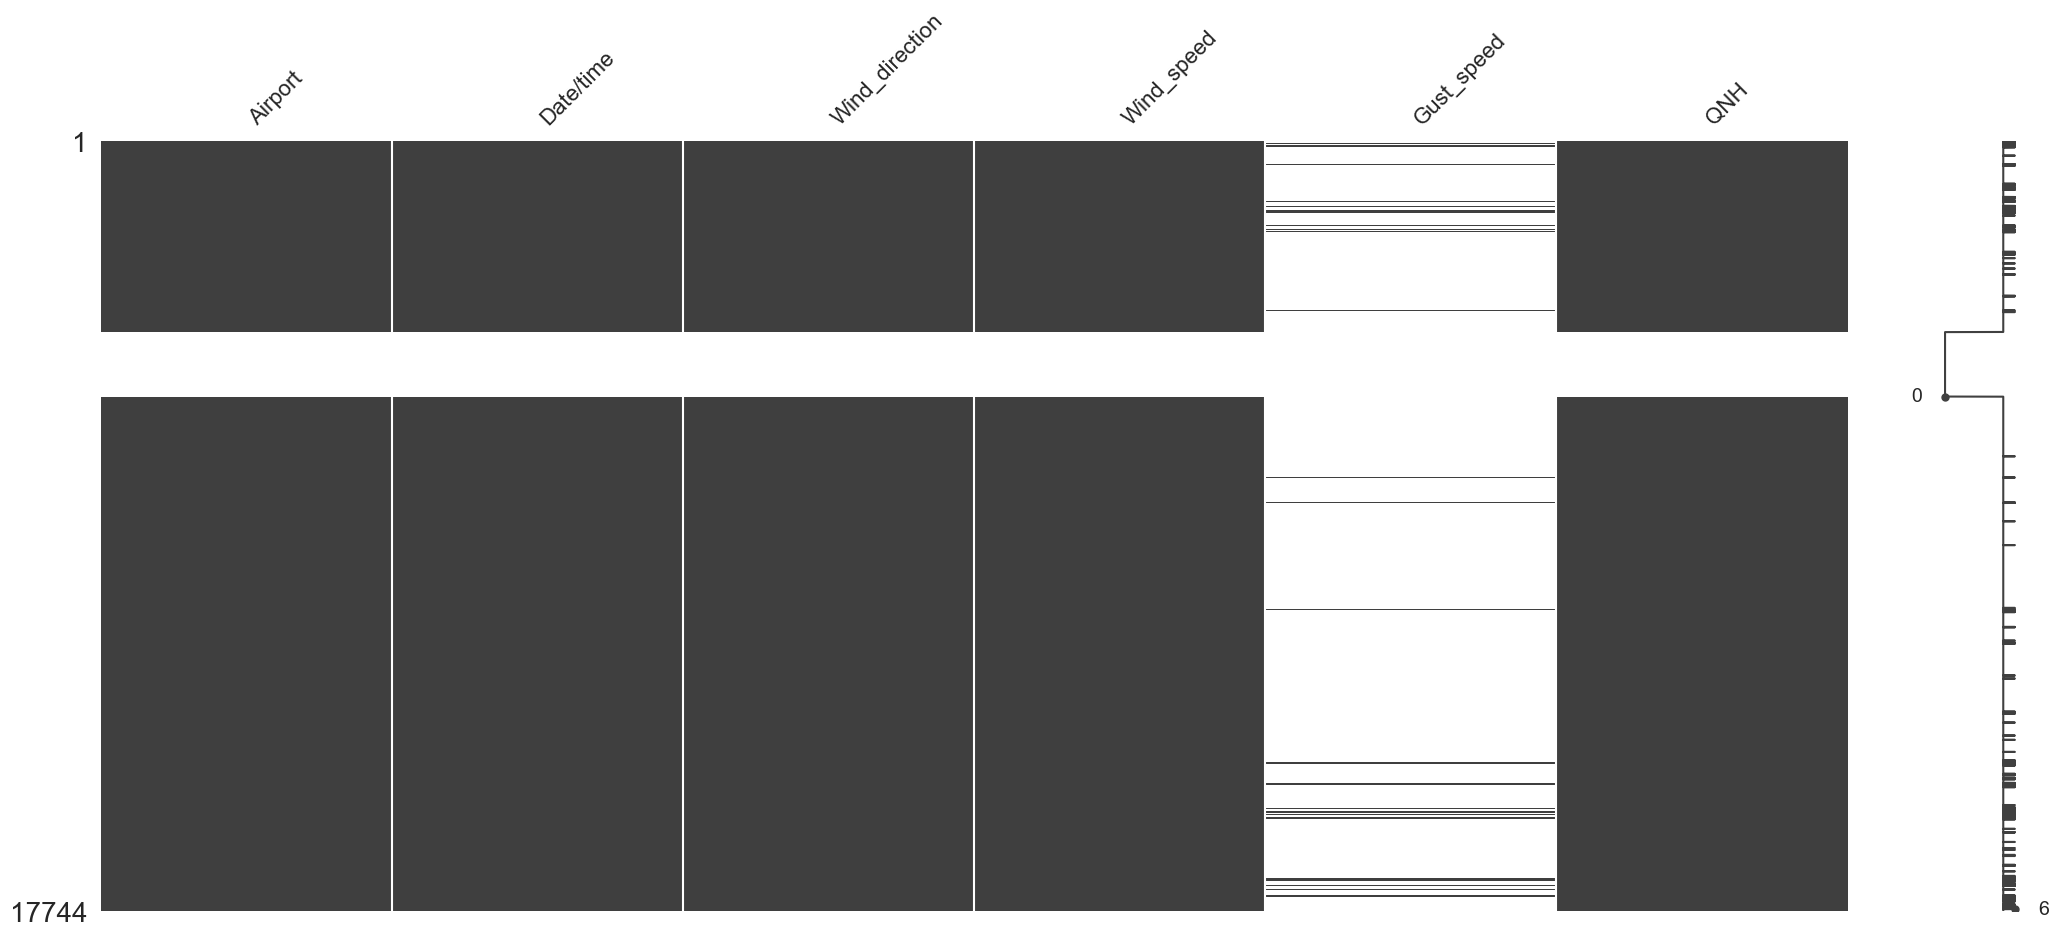

In [46]:
msno.matrix(df_ENOL_missing_data)

Matrisen tydeliggjør hvor datasettet har mangler
### Bar-chart for missing data for april

<Axes: >

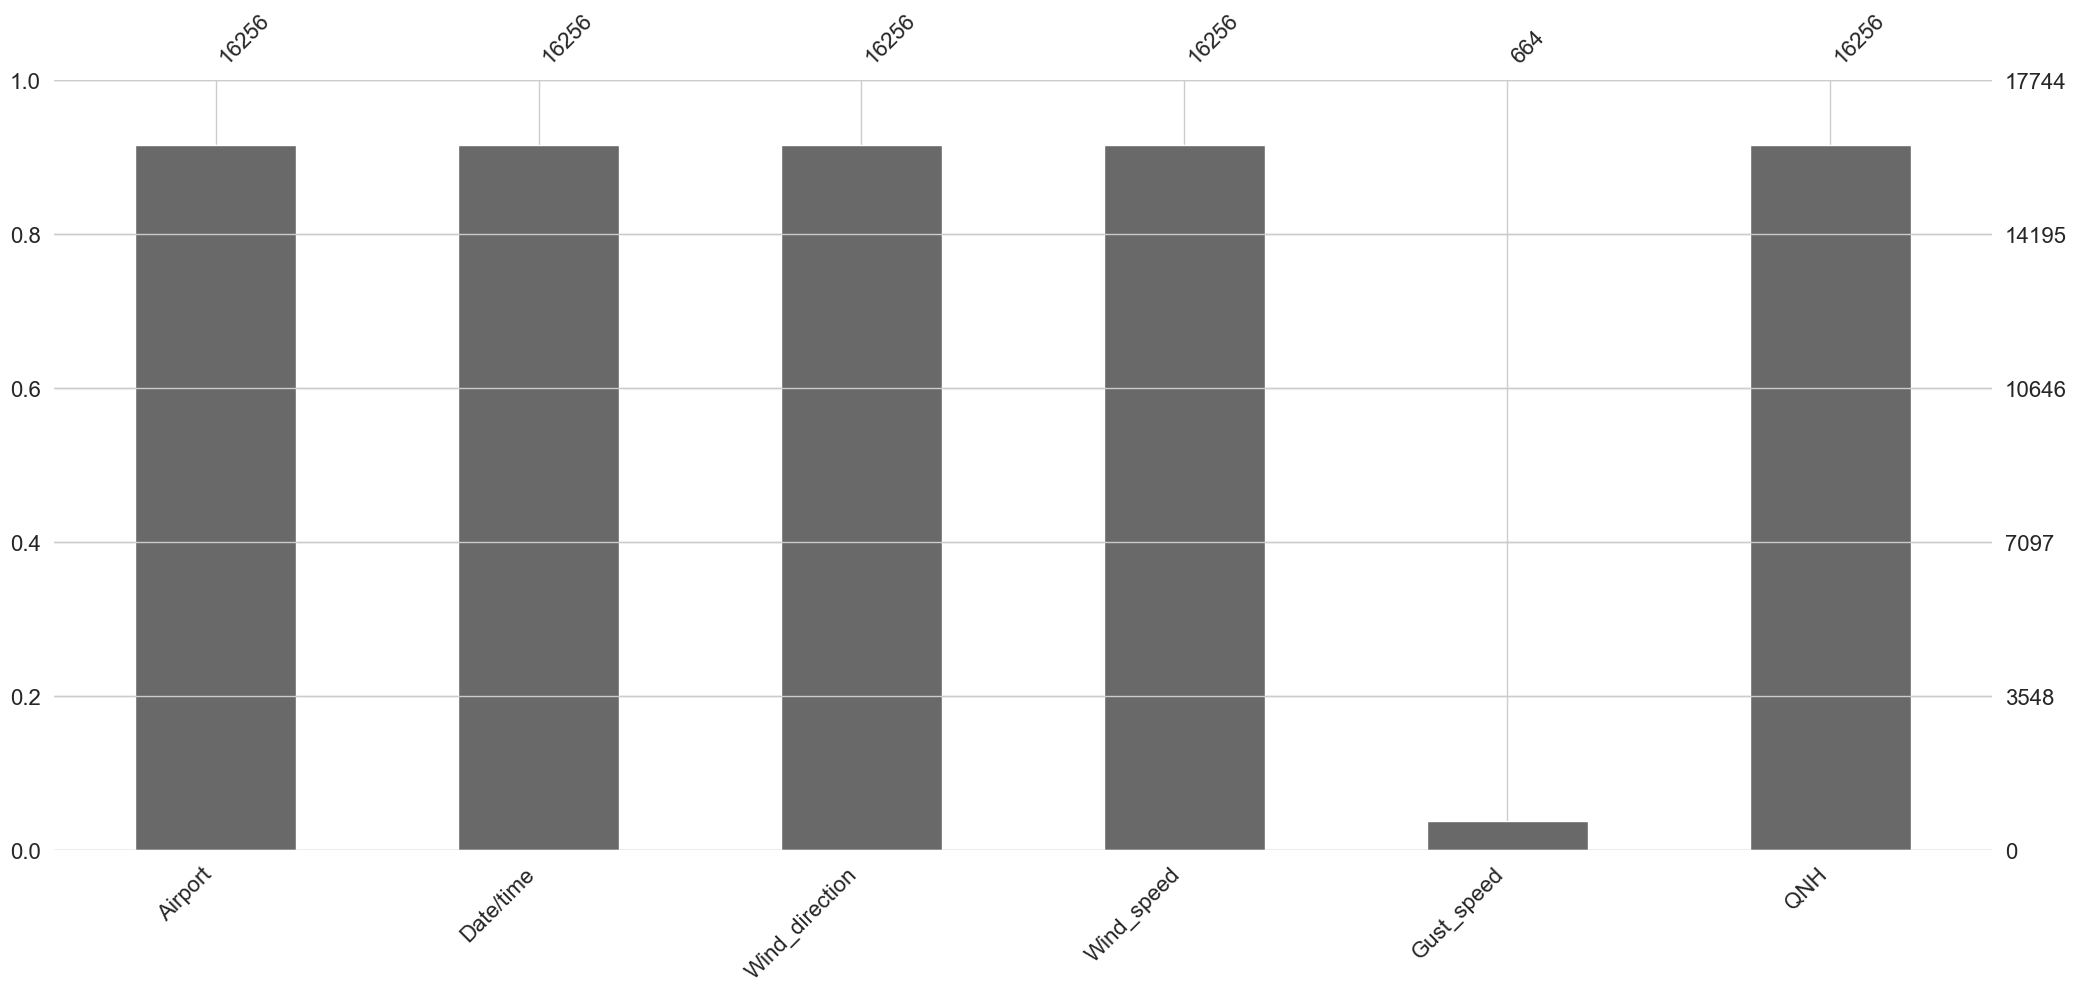

In [47]:
msno.bar(df_ENOL_missing_data)

### Scatterplot av vindhastighet over tid kl. 1220 hver dag i et år

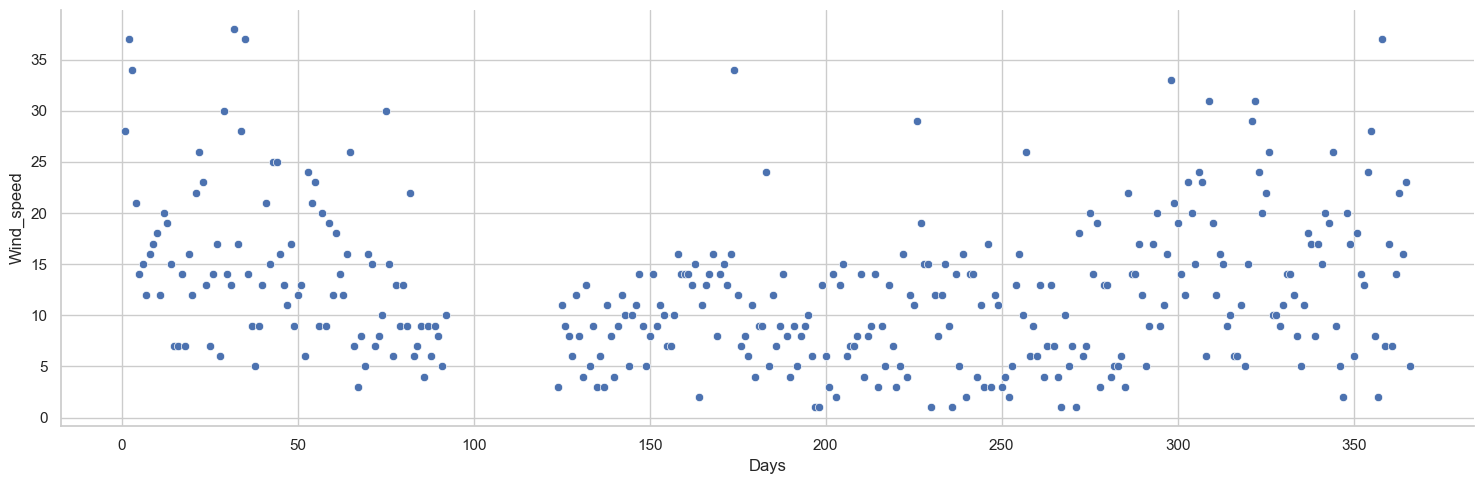

In [51]:
subset = df_ENOL_missing_data.copy()
subset_every_48 = subset.iloc[24::48].copy()
subset_every_48 = subset_every_48.iloc[:366].copy()
subset_every_48["Days"] = np.arange(1, len(subset_every_48) + 1)

# Plotting
plot1 = sns.relplot(x="Days", y="Wind_speed", kind="scatter", data=subset_every_48, height=5, aspect=3)
plot1.fig.suptitle("", y=1)

plt.show()


### Prediksjon av vindhastighet kl. 1220 i april

In [61]:
df_ENOL_missing_data

,Airport,Date/time,Wind_direction,Wind_speed,Gust_speed,QNH
0,ENOL,010020Z,120.0,31.0,NaN,1007.0
1,ENOL,010050Z,120.0,31.0,NaN,1006.0
2,ENOL,010120Z,120.0,32.0,NaN,1006.0
3,ENOL,010150Z,120.0,29.0,39.0,1006.0
4,ENOL,010220Z,120.0,30.0,44.0,1006.0
...,...,...,...,...,...,...
17739,ENOL,312150Z,110.0,10.0,NaN,999.0
17740,ENOL,312220Z,120.0,11.0,NaN,999.0
17741,ENOL,312250Z,130.0,12.0,NaN,998.0
17742,ENOL,312320Z,110.0,10.0,NaN,998.0


In [80]:
# Definerer input og target
#df_ENOL_missing_data.dropna()
data = df_ENOL_missing_data[['Wind_direction', 'Gust_speed', 'QNH', 'Wind_speed']].dropna()
x = data[['Wind_direction', 'Gust_speed', 'QNH']].dropna()
y = data['Wind_speed']

# Deler data inn i treningssett og testsett
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tren modellen
modell = LinearRegression()
modell.fit(x_train, y_train)

# Prediksjon på testdata
y_pred = modell.predict(x_test)

# Skrive ut resultater
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²-score:", r2_score(y_test, y_pred))
print("Koeffisienter:", modell.coef_)
print("Intercept:", modell.intercept_)

MSE: 2.197968356587414
R²-score: 0.9460216327130129
Koeffisienter: [-3.79442410e-04  8.72471107e-01 -9.12402318e-03]
Intercept: 2.8376163511540717


### Korrelasjon mellom vindhastighet og vindretning, vindkast-hastighet og Trykk (QNH)

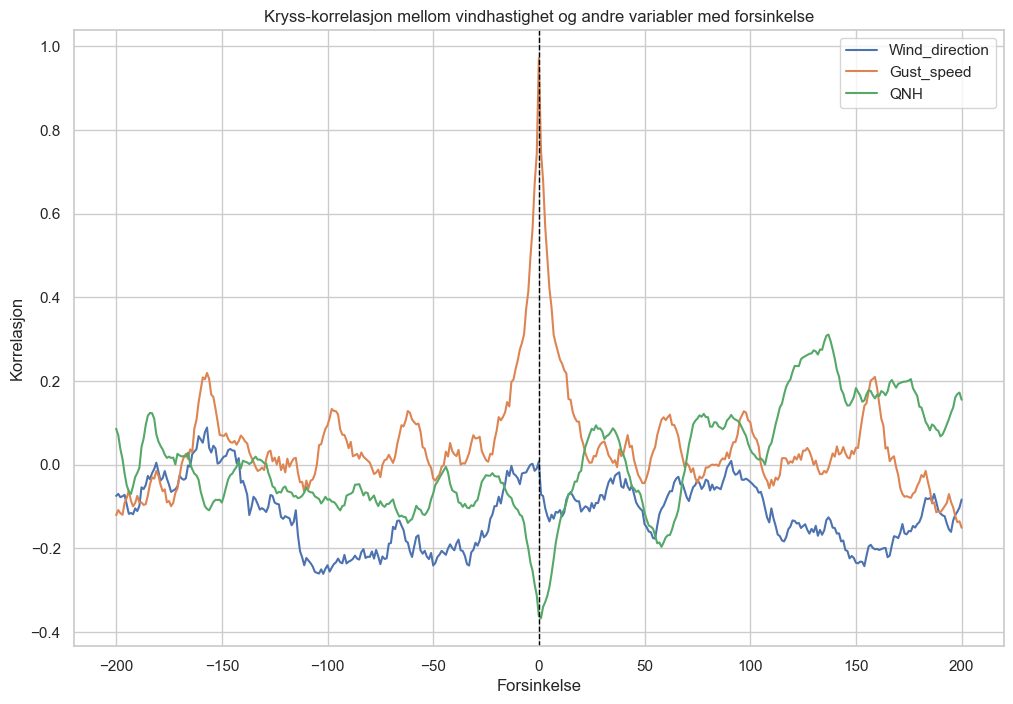

In [88]:
max_lag = 200
lags = np.arange(-max_lag, max_lag + 1)

plt.figure(figsize=(12, 8))

for col in ['Wind_direction', 'Gust_speed', 'QNH']:
    cross_corr = [data['Wind_speed'].corr(data[col].shift(lag)) for lag in lags]
    plt.plot(lags, cross_corr, label=col)

plt.title('Kryss-korrelasjon mellom vindhastighet og andre variabler med forsinkelse')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Forsinkelse')
plt.ylabel('Korrelasjon')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
correlation_1 = data['Wind_speed'].corr(data['Gust_speed'])
correlation_2 = data['Wind_speed'].corr(data['Wind_direction'])
correlation_3 = data['Wind_speed'].corr(data['QNH'])

print(f"Korrelasjon mellom vindhastighet og vindkast-hastighet er {correlation_1.round(2)}")
print(f"Korrelasjon mellom vindhastighet og vindretning er {correlation_2.round(2)}")
print(f"Korrelasjon mellom vindhastighet og trykk (QNH) er {correlation_3.round(2)}")

Korrelasjon mellom vindhastighet og vindkast-hastighet er 0.97
Korrelasjon mellom vindhastighet og vindretning er 0.01
Korrelasjon mellom vindhastighet og trykk (QNH) er -0.36


Vi ser at det er stor korrelasjon mellom vindhastighet og vindkast-hastighet. Ingen korrelasjon mellom retning og vindhastighet. Og en liten til middels korrelasjon mellom lavtrykk og høy vindhastighet.

Med bakgrunn i denne informasjonen kan vi kutte ut vindretning i prediksjonen, da denne har ingen korrelasjon.
### Scatter plot for prediksjon av vindhastighet sammenlignet med faktisk vindhastighet

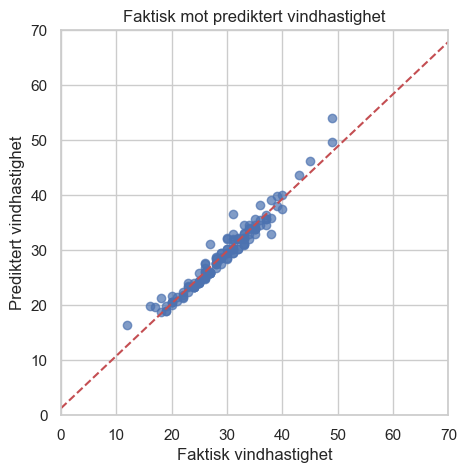

In [91]:
coeffs = np.polyfit(y_test, y_pred, deg=1)
trendline = np.poly1d(coeffs)
x_vals = np.linspace(0, 70, 100)

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(x_vals, trendline(x_vals), 'r--', label='Trendlinje')
plt.xlim(0, 70)
plt.ylim(0, 70)
plt.xlabel("Faktisk vindhastighet")
plt.ylabel("Prediktert vindhastighet")
plt.title("Faktisk mot prediktert vindhastighet")
plt.grid(True)
plt.show()

### Vindretning over tid med prediksjon for april (Ikke ferdig)

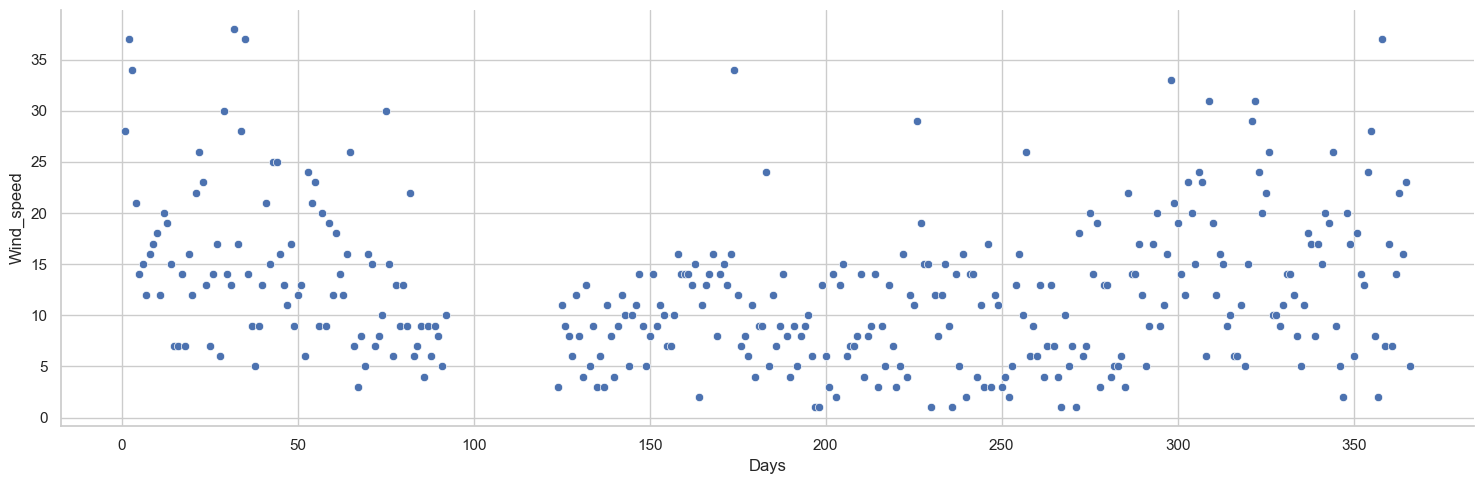

In [92]:
subset = df_ENOL_missing_data.copy()
subset_every_48 = subset.iloc[24::48].copy()
subset_every_48 = subset_every_48.iloc[:366].copy()
subset_every_48["Days"] = np.arange(1, len(subset_every_48) + 1)

# Plotting
plot1 = sns.relplot(x="Days", y="Wind_speed", kind="scatter", data=subset_every_48, height=5, aspect=3)
plot1.fig.suptitle("", y=1)

plt.show()
